In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import neural_network
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data from excel
data = pd.read_excel('dset_test012.xlsx',header=None)
#Converting dataframe to numpy array
data = np.array(data)

In [3]:
d = data[:,0:-1] #Features
l = data[:,-1]   #Label

#Creating training,validation and testing data
train_x, tdset_x, train_y, tdset_y = train_test_split(d,l,test_size=0.2)

valid_x, test_x, valid_y, test_y = train_test_split(tdset_x,tdset_y,test_size=0.5)

print(d.shape)
print(l.shape)
print(train_x.shape)
print(train_y.shape)
print(tdset_x.shape)
print(tdset_y.shape)
print(valid_x.shape)
print(valid_y.shape)
print(test_x.shape)
print(test_y.shape)


(1331, 12)
(1331,)
(1064, 12)
(1064,)
(267, 12)
(267,)
(133, 12)
(133,)
(134, 12)
(134,)


# NN

In [4]:
def nn_activation(x_train,y_train,x_test,y_test):
    error_rate = []
    activation = ['identity','logistic','tanh','relu']
    for i in activation:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,activation=i,learning_rate_init=0.001,
                                             max_iter=30000,shuffle=True)
        model.fit(x_train, y_train)
        print("Activation Function:",i)
        y_pred = model.predict(x_train)
        count=0
        for j in range(len(y_train)):
            if y_train[j] == y_pred[j]:
                count = count+1
        print("Accuracy on Training data:",(count/len(y_train)))
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
        print("Accuracy on Validation data:",(count/len(y_test)))
        
        
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at %s." % (error_rate[kloc], activation[kloc]))
    return activation[kloc]

In [5]:
def nn_hidden_layer(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=i,activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.show()
    return hidden_layer[kloc]

In [9]:
def nn_hidden_layer_2(x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=[30,35,40,45,50,55,60]
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(80,i),activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        count=0
        for j in range(len(y_test)):
            if y_test[j] == y_pred[j]:
                count = count+1
        error_rate.append((count/len(y_test)))
    kloc = error_rate.index(max(error_rate))
    print("Max accuracy is %s occurs at hidden layer size=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
    plt.title('Accuracy vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Accuracy')
    plt.show()
    return hidden_layer[kloc]

In [7]:
hidden_layer = nn_activation(train_x,train_y,valid_x,valid_y)

Activation Function: identity
Accuracy on Training data: 0.6870300751879699
Accuracy on Validation data: 0.6616541353383458
Activation Function: logistic
Accuracy on Training data: 0.6719924812030075
Accuracy on Validation data: 0.6466165413533834
Activation Function: tanh
Accuracy on Training data: 0.6889097744360902
Accuracy on Validation data: 0.6390977443609023
Activation Function: relu
Accuracy on Training data: 0.7171052631578947
Accuracy on Validation data: 0.6691729323308271
Max accuracy is 0.6691729323308271 occurs at relu.


Max accuracy is 0.6917293233082706 occurs at hidden layer size=80.


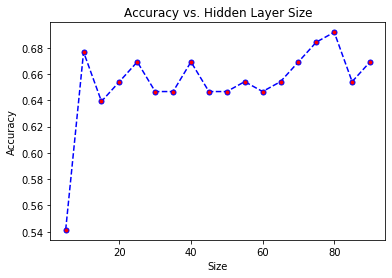

In [8]:
hidden_layer = nn_hidden_layer(train_x,train_y,valid_x,valid_y)

Max accuracy is 0.6992481203007519 occurs at hidden layer size=60.


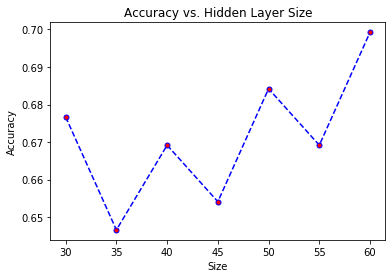

In [10]:
hidden_layer = nn_hidden_layer_2(train_x,train_y,valid_x,valid_y)

# Random Forrest

[ 96.71052632  97.36842105  97.7443609   98.02631579  98.30827068
  98.4962406   99.43609023  98.4962406   98.96616541  99.43609023
  99.71804511  99.43609023  99.62406015  99.34210526  99.81203008
  99.90601504  99.81203008  99.81203008  99.62406015  99.90601504
  99.81203008  99.81203008 100.         100.         100.
  99.90601504 100.          99.81203008 100.         100.
 100.          99.90601504  99.90601504  99.90601504 100.
  99.90601504 100.         100.         100.         100.
 100.         100.         100.         100.         100.
  99.90601504]
[70.67669173 66.16541353 63.90977444 64.66165414 64.66165414 69.17293233
 72.93233083 70.67669173 70.67669173 72.18045113 67.66917293 67.66917293
 66.91729323 73.68421053 68.42105263 70.67669173 71.42857143 69.17293233
 67.66917293 72.18045113 70.67669173 68.42105263 70.67669173 68.42105263
 70.67669173 73.68421053 74.43609023 75.93984962 68.42105263 68.42105263
 68.42105263 65.41353383 69.17293233 69.17293233 70.67669173 72.93

Text(0, 0.5, 'Accuracy [%]')

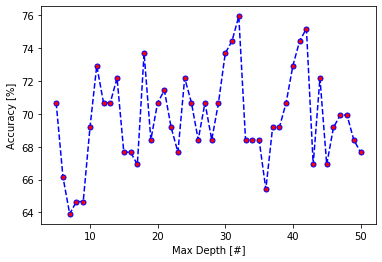

In [12]:
acc_train=[]
acc_test=[]
i=5
while i<=50:
    clf = RandomForestClassifier(n_estimators=i)
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(5,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Max Depth [#]')
plt.ylabel('Accuracy [%]')

# K Nearest Neighbour 

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100.]
[68.42105263 69.92481203 67.66917293 69.92481203 71.42857143 71.42857143
 69.92481203 72.18045113 69.92481203 72.18045113 70.67669173 72.93233083
 69.92481203 72.18045113 69.17293233 71.42857143 69.92481203 71.42857143
 69.92481203 69.17293233 70.67669173 72.93233083 70.67669173 73.68421053
 69.17293233 72.93233083 70.67669173 69.17293233 71.42857143 69.17293233
 71.42857143 71.42857143 71.42857143 71.42857143 72.18045113 71.42857143
 72.93233083 71.42857143 72.18045113 71.42857143 72.18045113 72.18045113
 71.42857143 72.93233083 72.93233083 73.68421053 71.42857143 72.18045113]


Text(0, 0.5, 'Accuracy [%]')

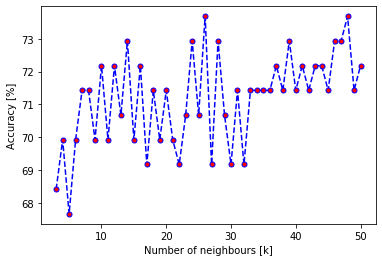

In [13]:
acc_train=[]
acc_test=[]
i=3
while i<=50:
    clf = KNeighborsClassifier(n_neighbors=i,weights='distance')
    clf = clf.fit(train_x,train_y)
    acc_train.append(clf.score(train_x,train_y)*100)
    acc_test.append(clf.score(valid_x,valid_y)*100)
    i+=1
    
print(np.array(acc_train))
print(np.array(acc_test))

plt.plot(np.arange(3,51),acc_test, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=5)
plt.xlabel('Number of neighbours [k]')
plt.ylabel('Accuracy [%]')

# Final Models

In [14]:
def classify(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    t_0 = 0
    t_1 = 0
    f_0 = 0
    f_1 = 0
    y_pred = model.predict(x_test)
    for i in range(len(y_test)):
        if y_test[i] == 0:
            if y_test[i]==y_pred[i]:
                t_0 = t_0+1
            else:
                f_1 = f_1+1
        elif y_test[i] == 1:
            if y_test[i] == y_pred[i]:
                t_1 = t_1+1
            else:
                f_0 = f_0+1
                
    print("Confusion Matrix:")            
    print("Predicted\Actual   Not Ghost    Ghost")
    print("Not Ghost          ",t_0,"        ",f_0)
    print("Ghost              ",f_1,"        ",t_1)
    print("Accuracy:",((t_0+t_1)/len(y_test)))
    print("Error Rate:",((f_0+f_1)/len(y_test)),"\n")
    print("Prediction of Not Ghost (clear) Fingerprints")
    print("-------------------")
    print("Precision:",(t_0/(t_0+f_0)))
    print("Recall:",(t_0/(t_0+f_1)),"\n")
    print("Prediction of Ghost Fingerprints")
    print("---------------------")
    print("Precision:",(t_1/(t_1+f_1)))
    print("Recall:",(t_1/(t_1+f_0)))

In [42]:
model_nn = neural_network.MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=80,activation='relu',
                                             learning_rate_init=0.001,max_iter=40000,shuffle=True)

model_rf = RandomForestClassifier(n_estimators=25)

model_knn = KNeighborsClassifier(n_neighbors=9,weights='distance') 


In [36]:
classify(model_nn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           52          20
Ghost               21          41
Accuracy: 0.6940298507462687
Error Rate: 0.30597014925373134 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.7222222222222222
Recall: 0.7123287671232876 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.6612903225806451
Recall: 0.6721311475409836


In [44]:
classify(model_rf,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           49          15
Ghost               24          46
Accuracy: 0.7089552238805971
Error Rate: 0.291044776119403 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.765625
Recall: 0.6712328767123288 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.6571428571428571
Recall: 0.7540983606557377


In [45]:
classify(model_knn,train_x,train_y,test_x,test_y)

Confusion Matrix:
Predicted\Actual   Not Ghost    Ghost
Not Ghost           50          17
Ghost               23          44
Accuracy: 0.7014925373134329
Error Rate: 0.29850746268656714 

Prediction of Not Ghost (clear) Fingerprints
-------------------
Precision: 0.746268656716418
Recall: 0.684931506849315 

Prediction of Ghost Fingerprints
---------------------
Precision: 0.6567164179104478
Recall: 0.7213114754098361
